Chloe Quinto    
CS 581    
HW 9    
I pledge my honor that I have abided by the Stevens Honor System - Chloe Quinto     

### Since this is more of an exploratory analysis, I switched to using jupyter notebook

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
fb_data = pd.read_csv('FB_data.csv')

In [3]:
fb_data.head()

,userid,age,dob_month,dob_day,dob_year,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,11,19,1999,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,11,2,1999,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,11,16,1999,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,12,25,1999,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,12,4,1999,male,82.0,0,0,0,0,0,0,0,0


In [4]:
len(fb_data)

99003

## Current Demographic 

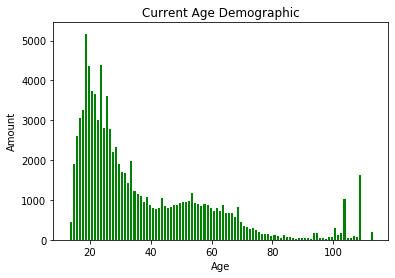

In [5]:
plt.hist(fb_data['age'], color="green", ec="white", bins=100)
plt.title("Current Age Demographic")
plt.xlabel("Age")
plt.ylabel("Amount")
plt.show()

Outliers such as accounts greater than 105 are most likely fake ages.

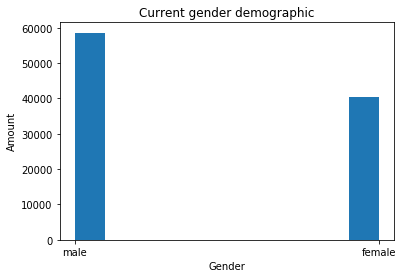

In [6]:
fb_data.dropna(inplace=True)
plt.hist(fb_data["gender"])
plt.title("Current gender demographic")
plt.xlabel("Gender")
plt.ylabel("Amount")
plt.show()

--- 

## Average Number of Friends per User

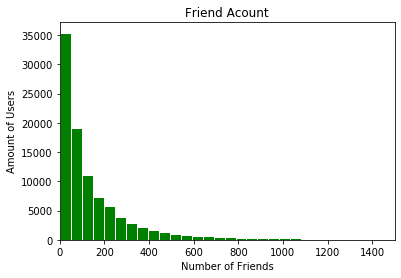

In [7]:
plt.hist(fb_data["friend_count"], color="green", ec="white", bins=100)
plt.ylabel("Amount of Users")
plt.xlabel("Number of Friends")
plt.title("Friend Acount")
plt.xlim(0,1500)
plt.show()

#### Dunbar's Number

We learned during this class that the theory of Dunbar's number holds that we can only really maintain about 150 connections at once. The above diagram shows that most the users in this data set have less than 500 friends on facebook. 

For me personally, when I add friends on FB I don't necessarily interact with them so they really aren't "connections" per se. Let's see if there is any correlation to the number of friends that one has to the number of likes they receive.

We should expect to see a positive correlation between the number of friends one has with the number of likes a person gets. 

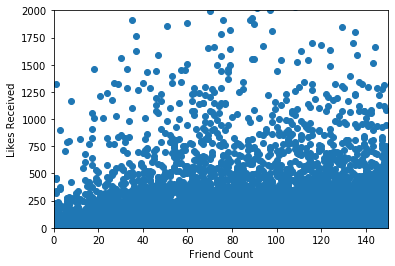

In [8]:
plt.scatter(fb_data["friend_count"], fb_data["likes_received"])
plt.xlim(0, 150)
plt.ylim(0,2000)
plt.xlabel("Friend Count")
plt.ylabel("Likes Received")
plt.show()

In [9]:
results = sm.OLS(fb_data["likes_received"],sm.add_constant(fb_data["friend_count"])).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         likes_received   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     5854.
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:00:32   Log-Likelihood:            -8.5252e+05
No. Observations:               98826   AIC:                         1.705e+06
Df Residuals:                   98824   BIC:                         1.705e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -23.8062      4.813     -4.946   

In [10]:
print("R2: ", results.rsquared)

R2:  0.0559210921220894


Looks like there is a weak positive correlation between  likes received and a user's friend count 

In [11]:
print("y="+str(results.params[1]) + "*x + " + str(results.params[0]))

y=0.8477273439786176*x + -23.806203658600637


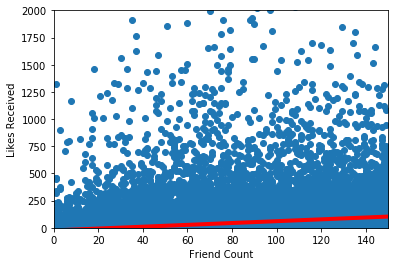

In [12]:
plt.scatter(fb_data["friend_count"], fb_data["likes_received"])
plt.plot(fb_data["friend_count"], results.params[1]*fb_data["friend_count"]+results.params[0], color="red", linewidth=4)
plt.xlim(0, 150)
plt.ylim(0,2000)
plt.xlabel("Friend Count")
plt.ylabel("Likes Received")
plt.show()

We can't confidently say that the more friends you have the more likes you receive. This may be due to the nature of facebook. Most users, including me, use it as a way of messaging communication rather than reading posts and liking them. As opposed to instagram, where the intention is to give and receive likes and comments. 

---
Another question we could ask: 

## Do females or males get more likes on facebook? 

ValueError: x and y must have same first dimension, but have shapes (0, 15) and (98826,)

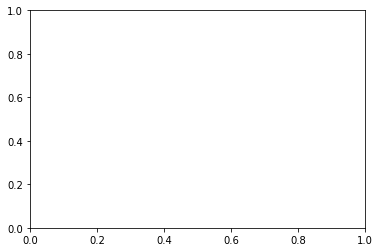

In [17]:
plt.plot(fb_data[fb_data["gender"] == 'females'], fb_data["likes_received"])
plt.show()